# Decision tree Classifier on Breast Cancer data set

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)


In [2]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracyon the training set: {0:.2%}".format(tree.score(X_train,y_train)))
print("Accuracyon the test set: {0:.2%}".format(tree.score(X_test,y_test)))

Accuracyon the training set: 100.00%
Accuracyon the test set: 93.71%


In [3]:
# playing with the parameters
# As we see our model is overfit
# TO tackle witht the overfitting we apply the proning.
#There are two types of proninig
# 1: Pre -> we restrict the depth of the tree in the start
# 2: post -> we make the tree till it fullz fits the model and then remove the leat impo. nodes


tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracyon the training set: {0:.2%}".format(tree.score(X_train,y_train)))
print("Accuracyon the test set: {0:.2%}".format(tree.score(X_test,y_test)))

Accuracyon the training set: 98.83%
Accuracyon the test set: 95.10%


In [4]:
# Graphviz library to draw graphs
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="cancertree.dot", class_name=['malignant','benign'], feature_name=cancer.feature_names
               ,impurity=False, filled=True)

ModuleNotFoundError: No module named 'graphviz'

In [5]:
# command to convert .dot file into ONG
# Go to termninal and to the folder where the dot file is
#dot -Tpng input_filename -o output_filename 



![](cancertree.png)

In [7]:
# see the feature importance to see which feature has most importance in the network
print ("Features importance array{}".format(tree.feature_importances_))

Features importance array[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


In [8]:
type(tree.feature_importances_)

numpy.ndarray

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


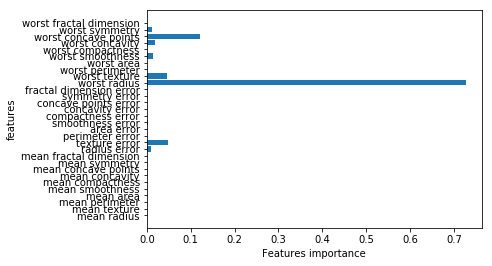

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Features importance")
plt.ylabel("features")
plt.legend()
plt.show()

In [16]:
n_features

30